### 📘 **BÁO CÁO GIAI ĐOẠN 1: THU THẬP DỮ LIỆU TUYỂN DỤNG NGÀNH IT TRÊN WEBSITE TOPCV**

---

#### 🚀 Mục tiêu

Thu thập toàn bộ các liên kết (URL) dẫn tới các bài đăng tuyển dụng trong ngành Công nghệ Thông tin trên website [TopCV - Việc làm IT](https://www.topcv.vn/viec-lam-it), phục vụ cho bước phân tích dữ liệu và khai thác nội dung sau này.

---

#### 🧩 Chiến lược thu thập

Quá trình crawl dữ liệu được chia thành 2 bước chính:

### 🌐 **Giai đoạn 1.1: Crawl tất cả các URL của trang hiển thị danh sách công việc**

* Do trang có nhiều page (tại thời điểm crawl là 85), ta dùng vòng lặp để tạo danh sách URL các trang như sau:

📌 *Nhận xét:* Không cần dùng công cụ tự động hóa như Selenium để click từng trang. Thay vào đó, chỉ cần biết quy luật URL phân trang là có thể sinh ra toàn bộ các link cần thiết – siêu tiết kiệm thời gian!

In [1]:
urls = [f"https://www.topcv.vn/viec-lam-it?page={i}" for i in range(1, 86)]

for url in urls:
    print(url)

https://www.topcv.vn/viec-lam-it?page=1
https://www.topcv.vn/viec-lam-it?page=2
https://www.topcv.vn/viec-lam-it?page=3
https://www.topcv.vn/viec-lam-it?page=4
https://www.topcv.vn/viec-lam-it?page=5
https://www.topcv.vn/viec-lam-it?page=6
https://www.topcv.vn/viec-lam-it?page=7
https://www.topcv.vn/viec-lam-it?page=8
https://www.topcv.vn/viec-lam-it?page=9
https://www.topcv.vn/viec-lam-it?page=10
https://www.topcv.vn/viec-lam-it?page=11
https://www.topcv.vn/viec-lam-it?page=12
https://www.topcv.vn/viec-lam-it?page=13
https://www.topcv.vn/viec-lam-it?page=14
https://www.topcv.vn/viec-lam-it?page=15
https://www.topcv.vn/viec-lam-it?page=16
https://www.topcv.vn/viec-lam-it?page=17
https://www.topcv.vn/viec-lam-it?page=18
https://www.topcv.vn/viec-lam-it?page=19
https://www.topcv.vn/viec-lam-it?page=20
https://www.topcv.vn/viec-lam-it?page=21
https://www.topcv.vn/viec-lam-it?page=22
https://www.topcv.vn/viec-lam-it?page=23
https://www.topcv.vn/viec-lam-it?page=24
https://www.topcv.vn/viec

### 🕸️ **Giai đoạn 1.2: Trích xuất URL từng bài đăng trên mỗi trang danh sách**

* Sử dụng **Selenium + kỹ thuật chờ** để đảm bảo nội dung đã load đầy đủ trước khi trích xuất.
* Cụ thể, ta chờ đến khi phần tử chứa avatar trong `box-header` xuất hiện (dấu hiệu bài đăng đã load xong) rồi mới bắt đầu lấy các link tuyển dụng.

📌 *Lý do phải chờ:* Vì trang web load động nội dung (có thể dùng JavaScript), nên nếu cào liền khi trang chưa kịp load, sẽ bị thiếu dữ liệu 😥

* Sử dụng XPATH để lọc ra các url của các tin tuyển dụng
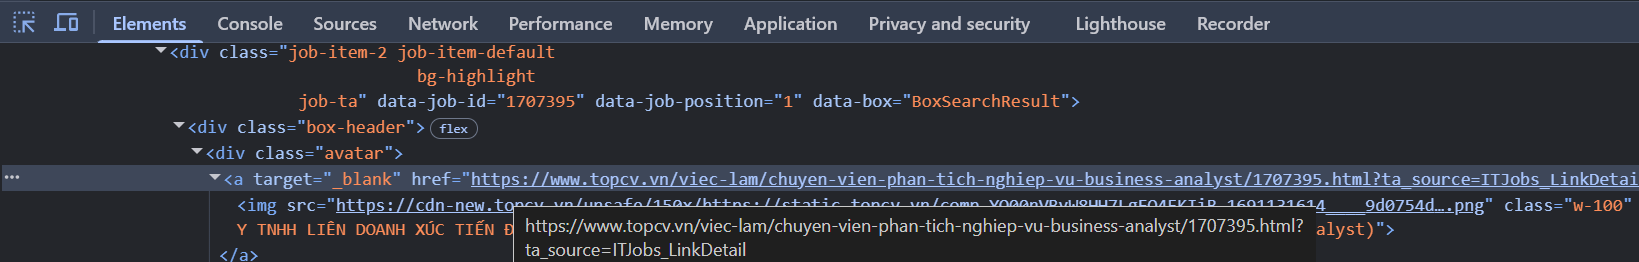

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Tuỳ chọn nếu muốn chạy headless (không hiện cửa sổ trình duyệt)
options = Options()

# Khởi tạo trình duyệt
driver = webdriver.Chrome(options=options)

In [3]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

all_posts = []

for url in urls:
    driver.get(url)
    
    try:
        # Đợi tối đa 10 giây đến khi phần tử avatar trong box-header xuất hiện
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located(("xpath", '//div[@class="box-header"]/div[@class="avatar"]/a[@href]'))
        )

        posts = driver.find_elements(By.XPATH, '//div[@class="box-header"]/div[@class="avatar"]/a[@href]')
        for post in posts:
            href = post.get_attribute("href")
            all_posts.append(href)

    except Exception as e:
        print(f"Lỗi ở URL {url}: {e}")


In [4]:
print(len(all_posts))

4235


In [5]:
print(len(posts))

35


### 💾 **Giai đoạn 1.3: Lưu trữ kết quả**

* Sau khi đã có danh sách các URL bài đăng, cậu lưu lại vào một file `.txt` để phục vụ cho giai đoạn phân tích tiếp theo:

### 🎯 Kết quả đạt được

* ✅ Tổng số **trang đã duyệt**: 85
* ✅ Số lượng **URL bài đăng tuyển dụng** thu thập được là 4235: *(có thể đếm bằng `len(all_posts)` khi chạy)*

In [7]:
import pandas as pd

data = {
'all_post_url': [all_posts] # Giữ nguyên danh sách trong một ô
}

df = pd.DataFrame(data)

df.to_csv('all_post_url.txt', index=False)

### 🌈 Định hướng tiếp theo

* **Giai đoạn 2**: Dựa trên các URL vừa thu thập, tiến hành *cào toàn bộ HTML* của các bài đăng.
* Sau đó, phân tích dữ liệu bằng các kỹ thuật Web Scraping để trích xuất các trường như: tên công ty, vị trí, lương, kỹ năng, mô tả công việc,... Ngoài ra giai đoạn 2 sẽ khá phức tạp khi phải bypass bảo mật chặn bot cloudflared.